# SYSM 6302 - Lab 1

In [265]:
import networkx as nx
import numpy as np
import matplotlib as mpl
import pandas as pd
import scipy
from IPython.display import Image

### Section 6.1 & 6.2 - Graph Definition

##### Graph Object Definition

In [211]:
G = nx.Graph()

##### Graph Construction

In [212]:
G.add_edge(1,2)
G.add_edge(2,3)
#... other things to make full graph, but easier other way

##### Alternative Construction Method

In [213]:
G = nx.Graph()
G.add_nodes_from(range(1,7)) # Added latter for reasons
G.add_edges_from([(1,2),(1,5),(2,3),(2,4),(5,3),(3,4),(3,6)])

##### Visualization for reasons

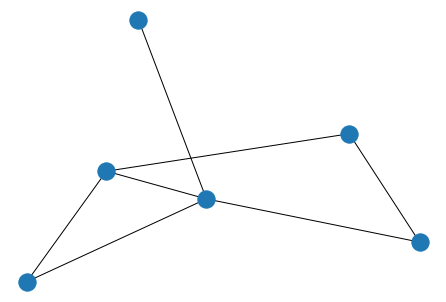

In [214]:
nx.draw(G)

##### Network Size

In [215]:
print('#Nodes: %i, #Edges: %i' % (G.number_of_nodes(),G.number_of_edges()))

#Nodes: 6, #Edges: 7


##### Network Verification

In [216]:
print('G_edge_3-4:' + str(G.has_edge(3,4)))
print('G_edge_4-6:' + str(G.has_edge(4,6)))

G_edge_3-4:True
G_edge_4-6:False


### Section 6.2 - Adjacency Matrix

##### Adjacency Matrix

In [217]:
A = nx.adjacency_matrix(G).todense().T
print('A = \n')
print(A)

A = 

[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]


##### Symetric Check

In [218]:
print('A.T = \n')
print(A.T)
print('\n Symetric?: ' + str(np.array_equal(A,A.T)))

A.T = 

[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 1]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]]

 Symetric?: True


### Section 6.3 - Weighted Networks

##### Graph Construction

In [219]:
G = nx.Graph()
G.add_nodes_from(range(1,7))
G.add_weighted_edges_from([(1,2,1),(1,5,3),(2,2,1),(2,3,2),(2,4,1),(5,3,1),(3,4,1),(3,6,1),(6,6,1)])

##### Adjacency Matrix

In [220]:
A = nx.adjacency_matrix(G).todense().T
print('A = \n')
print(A)

A = 

[[0 1 0 0 3 0]
 [1 1 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 1]]


##### Network Modification

In [221]:
G[2][2]['weight'] = 2
G[6][6]['weight'] = 2

In [222]:
A = nx.adjacency_matrix(G).todense()
print('A = \n')
print(A)

A = 

[[0 1 0 0 3 0]
 [1 2 2 1 0 0]
 [0 2 0 1 1 1]
 [0 1 1 0 0 0]
 [3 0 1 0 0 0]
 [0 0 1 0 0 2]]


### Section 6.4 - Directed Networks

#### Directed Network Construction

In [223]:
G = nx.DiGraph()
G.add_nodes_from(range(1,7))
G.add_edges_from([(1,3),(2,6),(3,2),(4,1),(4,5),(5,3),(6,5),(6,4)])

#### Adjacent Matrix

In [224]:
A = nx.adjacency_matrix(G).todense().T
print(A)

[[0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 1]
 [0 1 0 0 0 0]]


### Section 6.4.1

#### Data Import

In [225]:
G = nx.read_gml('proofwikidefs_la.gml','name')

##### Cocitation Algorithm

In [226]:
def cocitation(G): #Original attempt which mimics algorithm summations
    n = G.number_of_nodes()
    C = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            g = 0
            for k in range(n):
                if G.has_edge(k,i) and G.has_edge(k,j):
                    g += 1
            C[i][j] = g
    G_c = nx.from_numpy_matrix(C)
    return C, G_c

In [227]:
def cocitation(G): # Attempt w/ graphical method
    G_c = nx.Graph()
    G_c.add_nodes_from(G)
    for i_node in G.nodes():
        for j_node in G.nodes():
            if i_node == j_node:
                g_ij = 2 * len(set(G.predecessors(i_node)))
            else:
                g_ij = len(set(G.predecessors(i_node)) & set(G.predecessors(j_node)))
            G_c.add_weighted_edges_from([(i_node,j_node,g_ij)])
    return G_c

#### Testing Cocitation Algorithm

In [228]:
G_c = cocitation(G)
display(G_c)

In [229]:
C1 = nx.adjacency_matrix(G_c).todense().T
print(C1)

[[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 0]]


In [230]:
A = nx.adjacency_matrix(G).todense().T
C2 = np.dot(A,A.T)
print(C2)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [231]:
C_diff = C1 - C2
display(C_diff)

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 2., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [232]:
print('Difference between methods: ' + str(C_diff.sum().sum()))

Difference between methods: -3839.0


This may be an issue that is caused due to the lack of weighting being acounted for within the concitation function.

#### Weighting Implimentation

In [233]:
def cocitation(G): # Attempt 2 w/ graphical method
    G_c = nx.Graph()
    G_c.add_nodes_from(G)
    for i_node in G.nodes():
        for j_node in G.nodes():
            ij_nodes = set(G.predecessors(i_node)) & set(G.predecessors(j_node))
            g_ij = 0
            for ij_node in ij_nodes:
                g_ij += G[ij_node][i_node]['weight'] * G[ij_node][j_node]['weight']
            if g_ij > 0:
                G_c.add_weighted_edges_from([(i_node,j_node,g_ij)])
    return G_c

In [234]:
G_c = cocitation(G)

In [235]:
C1 = nx.adjacency_matrix(G_c).todense().T
print(C1)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [236]:
A = nx.adjacency_matrix(G).todense().T
C2 = np.dot(A,A.T)
print(C2)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [237]:
C_diff = C1 - C2
display(C_diff)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [238]:
print('Difference between methods: ' + str(C_diff.sum().sum()))

Difference between methods: 0.0


When acounting for the weighting of the edges, the discrepancy was eliminated.

#### 'Linear Combiniation' Node

The following provides a table of edges between the neighbors of the 'Linear Combination' node.

In [239]:
df = pd.DataFrame()

for i in G_c.neighbors('Linear Combination'):
    df = df.append(pd.DataFrame({'Node 1' : ['Linear Combination'],
                                 'Node 2': [i],
                                 'Weight' : [G_c['Linear Combination'][i]['weight']]}),
                   ignore_index=True)
df_c = df
display(df_c)

,Node 1,Node 2,Weight
0,Linear Combination,Vector (Euclidean Space),10.0
1,Linear Combination,Set of All Linear Transformations,1.0
2,Linear Combination,Ordered Basis,3.0
3,Linear Combination,Linearly Independent/Sequence/Real Vector Space,4.0
4,Linear Combination,Linearly Dependent/Sequence/Real Vector Space,6.0
5,Linear Combination,Linear Span,6.0
6,Linear Combination,Linear Combination of Subset,10.0
7,Linear Combination,Linear Combination of Sequence,8.0
8,Linear Combination,Linear Combination of Empty Set,6.0
9,Linear Combination,Linear Combination,26.0


The following provides a table of edges between the in-neighbors of the 'Linear Combination' node for the directed network..

In [240]:
df = pd.DataFrame()

for i in G.predecessors('Linear Combination'):
    df = df.append(pd.DataFrame({'Node 2' : ['Linear Combination'],
                                 'Node 1': [i],
                                 'Weight' : [G[i]['Linear Combination']['weight']]}))
df_d = df
display(df_d)

,Node 2,Node 1,Weight
0,Linear Combination,Spanning Set,1.0
0,Linear Combination,Linearly Dependent/Sequence/Real Vector Space,1.0
0,Linear Combination,Linear Span,1.0
0,Linear Combination,Linear Combination/Subset,1.0
0,Linear Combination,Linear Combination/Sequence,1.0
0,Linear Combination,Linear Combination/Empty Set,1.0
0,Linear Combination,Linear Combination of Subset,1.0
0,Linear Combination,Linear Combination of Sequence,1.0
0,Linear Combination,Linear Combination of Empty Set,1.0
0,Linear Combination,Generator/Module/Spanning Set,1.0


##### Bibliographic Coupling

In [241]:
def bibCoupling(G):
    G_b = nx.Graph()
    G_b.add_nodes_from(G)
    for i_node in G.nodes():
        for j_node in G.nodes():
            ij_nodes = set(G.successors(i_node)) & set(G.successors(j_node))
            g_ij = 0
            for ij_node in ij_nodes:
                g_ij += G[i_node][ij_node]['weight'] * G[j_node][ij_node]['weight']
            if g_ij > 0:
                G_b.add_weighted_edges_from([(i_node,j_node,g_ij)])
    return G_b

In [242]:
G_b = bibCoupling(G)

In [243]:
B1 = nx.adjacency_matrix(G_b).todense().T
print(B1)

[[1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 5. ... 1. 2. 0.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 2. ... 1. 4. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [244]:
A = nx.adjacency_matrix(G).todense().T
B2 = np.dot(A.T,A)
print(B2)

[[1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 5. ... 1. 2. 0.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 2. ... 1. 4. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [245]:
B_diff = B1 - B2
display(B_diff)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [246]:
print('Difference between methods: ' + str(B_diff.sum().sum()))

Difference between methods: 0.0


#### Concept Question

Assuming the matrix given is an adjacency matrix of the cocitation network, it is know that all of the nodes are pointed to 4 other nodes.

In [247]:
A = 4 * (np.ones(6) - np.eye(6))
print(A)

[[0. 4. 4. 4. 4. 4.]
 [4. 0. 4. 4. 4. 4.]
 [4. 4. 0. 4. 4. 4.]
 [4. 4. 4. 0. 4. 4.]
 [4. 4. 4. 4. 0. 4.]
 [4. 4. 4. 4. 4. 0.]]


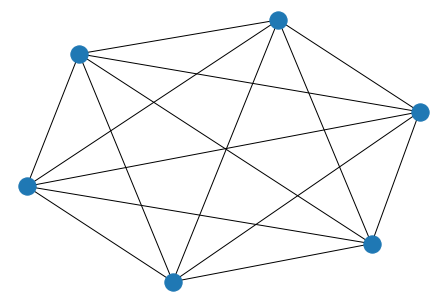

In [248]:
G = nx.Graph(A)
nx.draw(G)

The equivelent cocitation matrix for this graph is given as:

Intuitivly the unweighted directed network can then be guessed as a network whoose vertices point to every other vertex besides itself:

In [249]:
A_C = np.ones(6) - np.eye(6)
print(A_C)

[[0. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0.]]


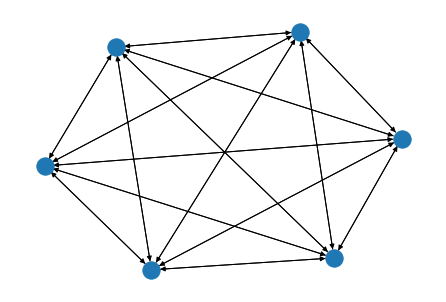

In [250]:
G = nx.DiGraph(A_C)
nx.draw(G)

The coresponding Bibliographic Coupling equivelent graph can then be calculated using the function developed previously:

In [251]:
G_B = bibCoupling(G)
B = nx.adjacency_matrix(G_B).todense().T
print(B)

[[5. 4. 4. 4. 4. 4.]
 [4. 5. 4. 4. 4. 4.]
 [4. 4. 5. 4. 4. 4.]
 [4. 4. 4. 5. 4. 4.]
 [4. 4. 4. 4. 5. 4.]
 [4. 4. 4. 4. 4. 5.]]


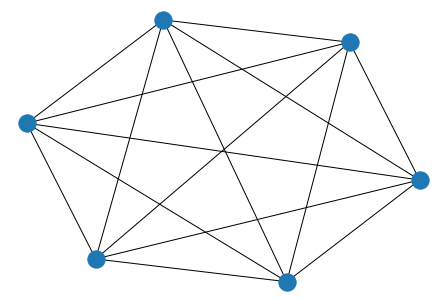

In [252]:
nx.draw(G_B)

### Section 6.4.2 - Acyclic Networks

#### Acyclic function

In [253]:
def acyclic(G):
    acyclic = False
    nodes = list(G.nodes())
    while not acyclic:
        if G.number_of_nodes() == 0:
            acyclic = True
            print('System is Acyclic')
            break
        for node in nodes:
            if G.out_degree(node) == 0:
                G.remove_node(node)
                found_node = True
                break
            else:
                found_node = False
        if found_node == False:
            print('System is Cyclic')
            break
    return acyclic

In [254]:
G1 = nx.read_weighted_edgelist('acyclic1.edgelist', create_using=nx.DiGraph)
acyclic(G1);

System is Acyclic


In [255]:
G2 = nx.read_weighted_edgelist('acyclic2.edgelist', create_using=nx.DiGraph)
acyclic(G2);

System is Acyclic


In [256]:
filename = 'acyclic3.edgelist'
G3 = nx.read_weighted_edgelist(filename, create_using=nx.DiGraph)
acyclic(G3);

System is Cyclic


### Section 6.6 - Bipartite Networks

#### One-mode projection

It possible to use either the cocitation or bibliographic coupoling functions on the DiGraphs we represent bipartite networks in to create essentially one-mode projections, but it depends on which mapping is wanted to which one is to be used. To find the one-mode projection of the actor-movie bipartite network onto the actors/actresses you would use bibliographic coupoling becouse we only save the digraph with edges pointing from actors to movies so it needs to check how many vertices (movies) that are pointined to they share.

In [257]:
B = nx.read_gml('2013-actor-movie-bipartite.gml', 'name')

In [258]:
P = bibCoupling(B)

In [259]:
print('Will Ferrell\'s Neighbors:')
print('------------------')
for node in P.neighbors('Will Ferrell'):
    print(node)

Will Ferrell's Neighbors:
------------------
Brad Pitt
Matt Damon
Bradley Cooper
Mark Wahlberg
Melissa McCarthy
Ben Affleck
Dwayne Johnson
Natalie Portman
Tina Fey
Steve Carell
Will Ferrell
Seth Rogen
Amy Adams
Ben Stiller
Jonah Hill
Paul Rudd
Julianne Moore
Rachel McAdams
Kristen Wiig
Owen Wilson
Jason Bateman


In [260]:
print('Jason Statham\'s Neighbors:')
print('------------------')
for node in P.neighbors('Jason Statham'):
    print(node)

Jason Statham's Neighbors:
------------------
Brad Pitt
Tom Cruise
Mark Wahlberg
Robert De Niro
Javier Bardem
Chris Evans
Charlize Theron
Bruce Willis
Jamie Foxx
Sylvester Stallone
Jason Statham
Liam Hemsworth


#### Concept Question:

This particular one-mode projection provides information on which actors star in the same movie with each other. Each edge includes a weight indicating how many movies each actor are in together. If you know information about other actors, such as what types of movies they star in (ie comondy, action, thriller, etc.) you can apply that information together the one-mode projection to pridect what types of moveies they star in.

#### Neighbor Count

In [261]:
print('Number of neighbors Zac Efron has: ' + str(len(set(P.neighbors('Zac Efron')))))
print('Number of neighbors Clint Eastwood has: ' + str(len(set(P.neighbors('Clint Eastwood')))))


Number of neighbors Zac Efron has: 2
Number of neighbors Clint Eastwood has: 2


Becouse this network only contains movies from 2013, it is not nessicarily surprising that they only have 2 neighbors (including themselves) each if they didn't star in as many movies that year. It is also possible that they stared in movies that didn't contain any of the other actors/actresses in the graph.

## Section 6.7 - Trees

#### Concept Questions

The biggest difference between a directed tree and a general acyclic network is with the number of paths between nodes (basically a parent/child relationship). In a tree there are root nodes that will connect down to the leaves and that is the only path between the nodes.

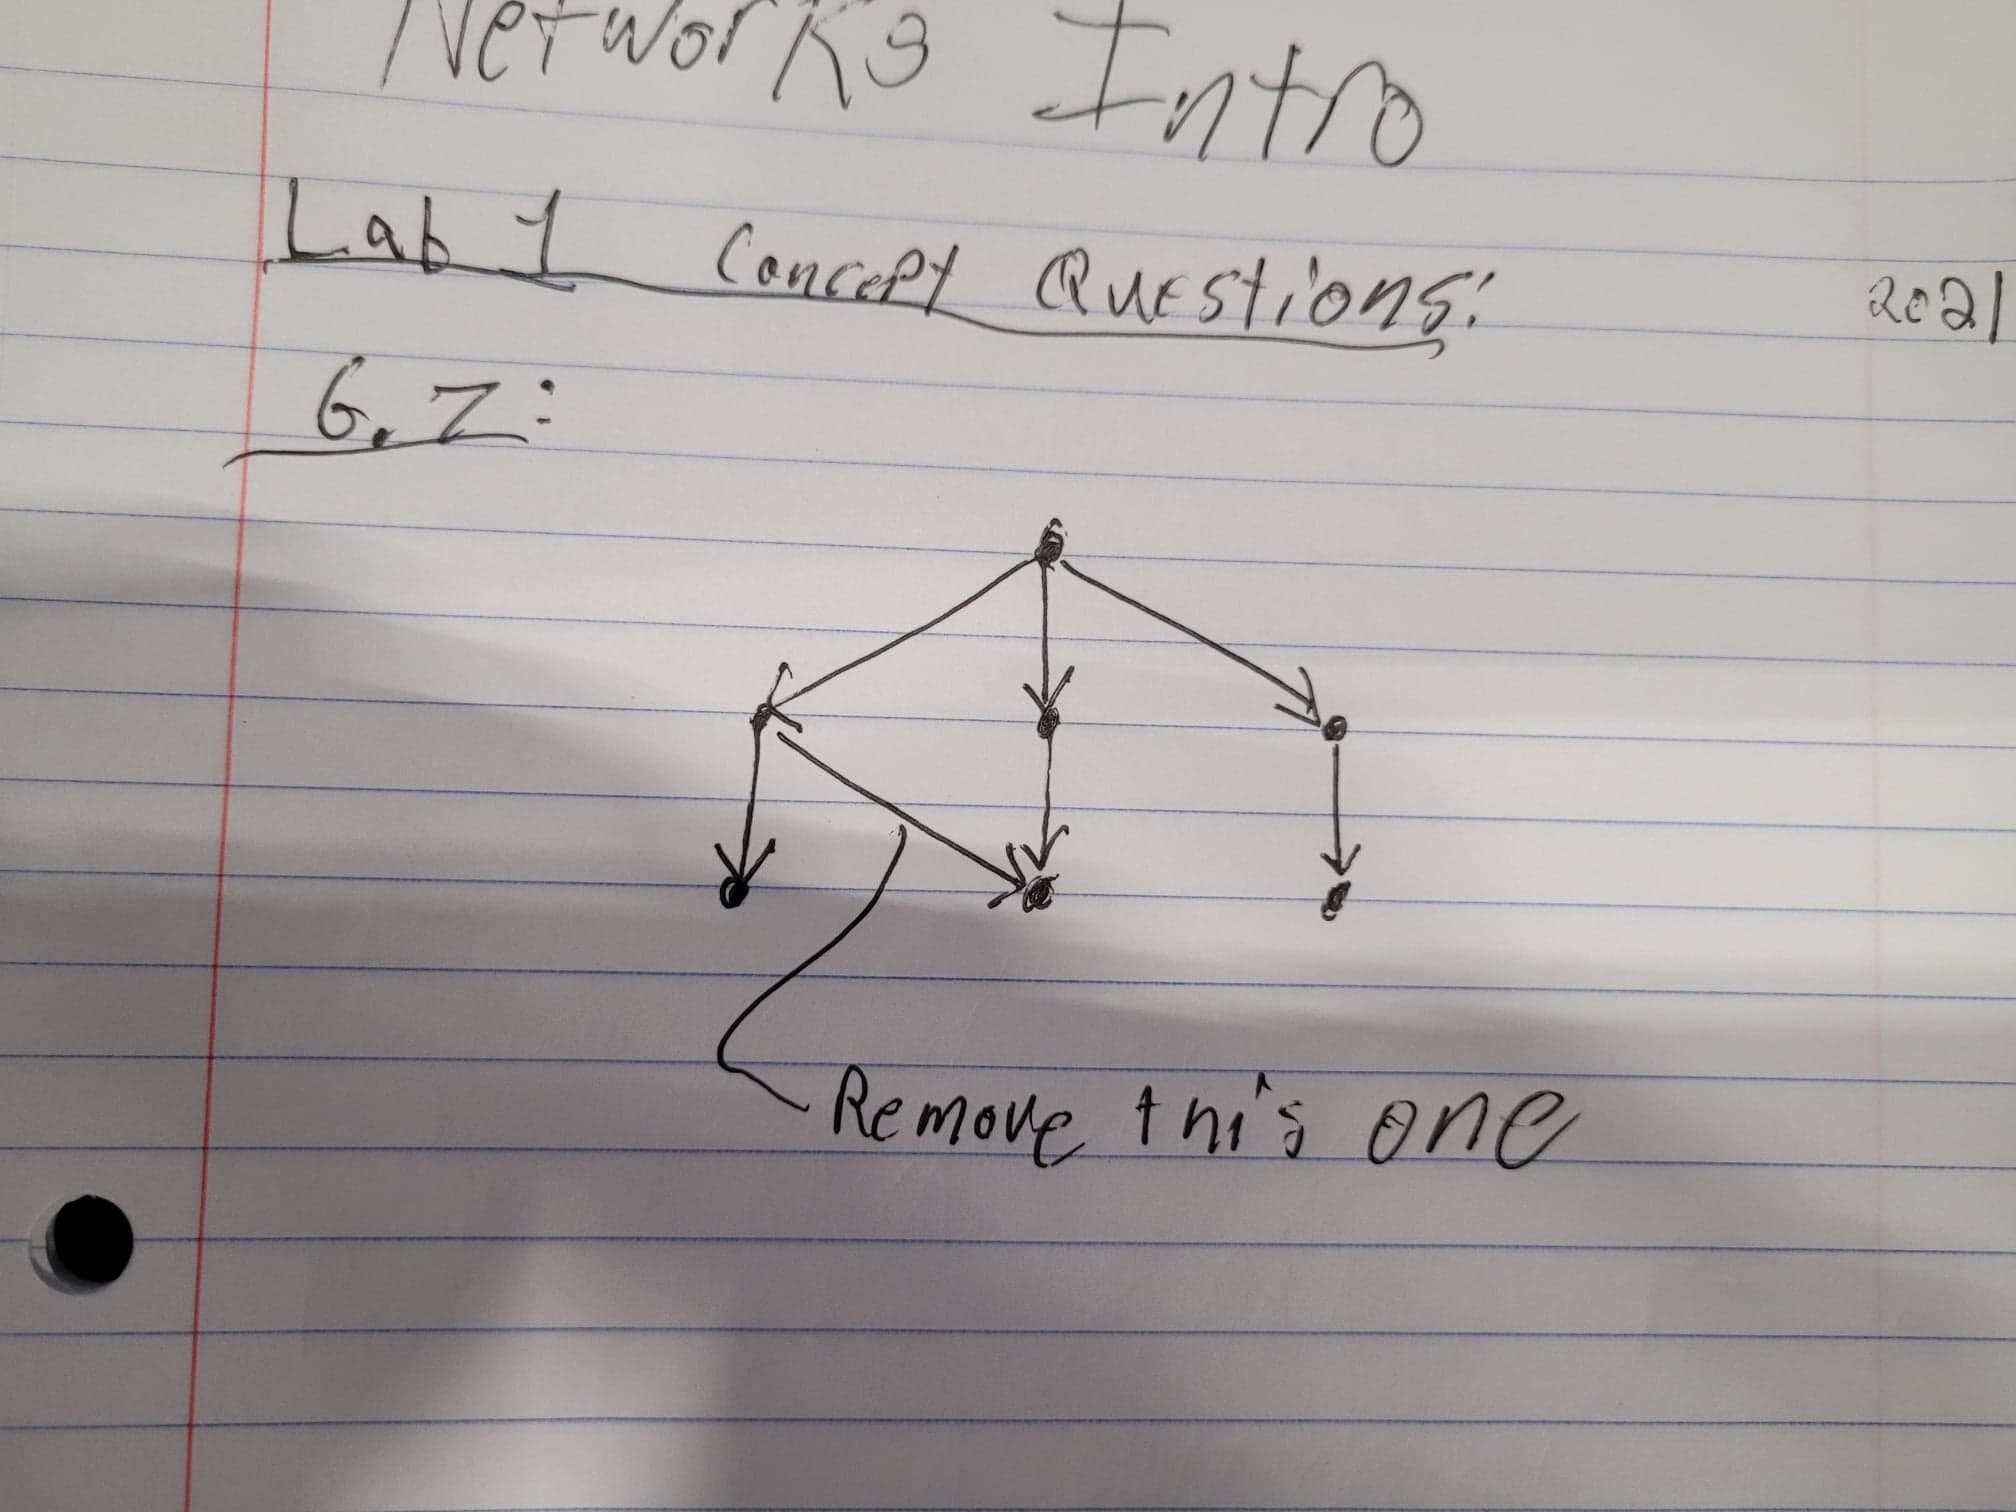

In [266]:
Image(filename = 'fig/tree.jpg')

This is not unique tree from the given nodes. Varing the number of branches or the length of one branch vs another can drastically change the overall structure of a tree.